<a href="https://colab.research.google.com/github/danaa23/AI-Crash-Course/blob/master/Dropout_analysis_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dropout Model Text Analytics**

In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/New Persistence_EditedbyLovey(Cleaned Data-LOVEY).csv'
df = pd.read_csv(file_path)
df.describe()
df = pd.DataFrame(df)

# Rename the column
df.rename(columns={'1E+13': 'last_mm_tot_credits'}, inplace=True)

# Display the DataFrame to verify the renaming
print(df)



       SDBSrcSystemKey  AcademicCareerEntryQtrKeyId  transfer_student  \
0              1099262                        20081                 1   
1              1099263                        20144                 1   
2              1099264                        20074                 1   
3              1099266                        20084                 1   
4              1099273                        20074                 1   
...                ...                          ...               ...   
64113          1213205                        20094                 1   
64114          1213206                        20094                 1   
64115          1213208                        20094                 1   
64116          1213209                        20094                 1   
64117          1213210                        20094                 1   

            Entry_group EntryResidentCategory  PELL_Eligible_at_Entry  \
0      Transfer Student              Resident     

In [11]:
dropout_analysis = df['Dropout'].value_counts()
dropout_percentage = df['Dropout'].value_counts(normalize=True) * 100

# Print the results
print("Dropout Analysis:")
print(dropout_analysis)
print("\nDropout Percentage:")
print(dropout_percentage)

Dropout Analysis:
Dropout
0    52868
1    11250
Name: count, dtype: int64

Dropout Percentage:
Dropout
0    82.454225
1    17.545775
Name: proportion, dtype: float64


In [5]:
df.describe()

,SDBSrcSystemKey,AcademicCareerEntryQtrKeyId,transfer_student,PELL_Eligible_at_Entry,EntryFullTimeStudentFlag,Lost_at_Term,LastCareerLevelEnrolledAcademicQtrKeyId,Re_enrolled_next_academic_year,degree_UWT,Graduated,...,entry_tot_credits,second_year_class_code,second_year_ncr_code,second_year_tot_credits,last_mm_tot_credits,last_mm_class,major_pathway,CensusDayCumGPA,Age,Dropout
count,6.411800e+04,64118.000000,64118.000000,64118.00000,64118.000000,64118.000000,64118.000000,64118.000000,64118.000000,64118.000000,...,64118.000000,64118.000000,64118.000000,64118.000000,64118.000000,64118.000000,64098.000000,64118.000000,64118.000000,64118.000000
mean,1.670276e+06,20150.739012,0.714807,0.42662,0.843663,8.536854,20170.708007,0.826757,0.661530,0.670919,...,69.273864,2.511027,1.117065,118.355819,152.258944,3.550547,0.676121,3.188307,32.654387,0.175458
std,4.831015e+05,50.124359,0.451510,0.49459,0.363177,5.494251,48.640266,0.378460,0.473193,0.469883,...,38.735268,1.564186,2.072772,34.442588,54.304407,0.883515,4.017902,0.610957,9.370719,0.380361
min,1.675300e+04,20054.000000,0.000000,0.00000,0.000000,1.000000,20054.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,1.277384e+06,20114.000000,0.000000,0.00000,1.000000,5.000000,20132.000000,1.000000,0.000000,0.000000,...,47.000000,1.000000,0.000000,118.000000,133.000000,3.000000,0.000000,2.950000,26.000000,0.000000
50%,1.622782e+06,20154.000000,1.000000,0.00000,1.000000,7.000000,20173.000000,1.000000,1.000000,1.000000,...,90.000000,3.000000,0.000000,123.000000,168.000000,4.000000,0.000000,3.260000,31.000000,0.000000
75%,2.063920e+06,20194.000000,1.000000,1.00000,1.000000,11.000000,20213.000000,1.000000,1.000000,1.000000,...,93.000000,4.000000,0.000000,140.000000,181.000000,4.000000,0.000000,3.620000,37.000000,0.000000
max,2.681852e+06,20234.000000,1.000000,1.00000,1.000000,71.000000,20234.000000,1.000000,1.000000,1.000000,...,280.000000,11.000000,5.000000,281.000000,327.000000,8.000000,80.000000,4.000000,95.000000,1.000000


from matplotlib import pyplot as plt
_df_0['SDBSrcSystemKey'].plot(kind='hist', bins=20, title='SDBSrcSystemKey')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AcademicCareerEntryQtrKeyId'].plot(kind='hist', bins=20, title='AcademicCareerEntryQtrKeyId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['transfer_student'].plot(kind='hist', bins=20, title='transfer_student')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PELL_Eligible_at_Entry'].plot(kind='hist', bins=20, title='PELL_Eligible_at_Entry')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='SDBSrcSystemKey', y='AcademicCareerEntryQtrKeyId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='AcademicCareerEntryQtrKeyId', y='transfer_student', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='transfer_student', y='PELL_Eligible_at_Entry', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PELL_Eligible_at_Entry', y='EntryFullTimeStudentFlag', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TimeToDegreeInYears']
  ys = series['SDBSrcSystemKey']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('TimeToDegreeInYears', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeToDegreeInYears')
_ = plt.ylabel('SDBSrcSystemKey')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TimeToDegreeInYears']
  ys = series['AcademicCareerEntryQtrKeyId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('TimeToDegreeInYears', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeToDegreeInYears')
_ = plt.ylabel('AcademicCareerEntryQtrKeyId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TimeToDegreeInYears']
  ys = series['transfer_student']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('TimeToDegreeInYears', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeToDegreeInYears')
_ = plt.ylabel('transfer_student')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TimeToDegreeInYears']
  ys = series['PELL_Eligible_at_Entry']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('TimeToDegreeInYears', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeToDegreeInYears')
_ = plt.ylabel('PELL_Eligible_at_Entry')

from matplotlib import pyplot as plt
_df_12['SDBSrcSystemKey'].plot(kind='line', figsize=(8, 4), title='SDBSrcSystemKey')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['AcademicCareerEntryQtrKeyId'].plot(kind='line', figsize=(8, 4), title='AcademicCareerEntryQtrKeyId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['transfer_student'].plot(kind='line', figsize=(8, 4), title='transfer_student')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['PELL_Eligible_at_Entry'].plot(kind='line', figsize=(8, 4), title='PELL_Eligible_at_Entry')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

first_generation           18518
RetainedNoYesYearLater      4626
RetainedNo2YearLater       27936
second_year_college        14084
major_abbr                    20
major_pathway                 20
FinCollegeReportingName       94
dtype: int64


In [9]:
na_counts = df.isna().sum()
print(na_counts[na_counts > 0])

first_generation           18518
RetainedNoYesYearLater      4626
RetainedNo2YearLater       27936
second_year_college        14084
major_abbr                    20
major_pathway                 20
FinCollegeReportingName       94
dtype: int64


In [11]:
# Fill missing values with the most frequent value (mode)
columns_with_na = ['first_generation', 'RetainedNoYesYearLater', 'RetainedNo2YearLater',
                   'second_year_college', 'major_abbr', 'major_pathway', 'FinCollegeReportingName']

for column in columns_with_na:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [14]:
print(df)
# df.isnull().sum()

       SDBSrcSystemKey  AcademicCareerEntryQtrKeyId  transfer_student  \
0              1099262                        20081                 1   
1              1099263                        20144                 1   
2              1099264                        20074                 1   
3              1099266                        20084                 1   
4              1099273                        20074                 1   
...                ...                          ...               ...   
64113          1213205                        20094                 1   
64114          1213206                        20094                 1   
64115          1213208                        20094                 1   
64116          1213209                        20094                 1   
64117          1213210                        20094                 1   

            Entry_group EntryResidentCategory  PELL_Eligible_at_Entry  \
0      Transfer Student              Resident     

In [23]:
categorical_columns = [
    'Entry_group', 'EntryResidentCategory', 'EntryIPEDSRaceEthnicityCategory',
    'EntryGenderCode', 'first_generation', 'entry_college', 'entry_major',
    'second_year_college', 'second_year_major', 'major_abbr',
    'FinCollegeReportingName', 'new_vet_desc'
]

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verify that there are no more missing values in the specified columns
null_counts_after = df[categorical_columns].isnull().sum()
print(null_counts_after[null_counts_after > 0])

Series([], dtype: int64)


In [24]:
# Analyze dropout rates for each category
dropout_analysis = {}

for category in categorical_columns:
    grouped = df.groupby(category)['Dropout'].mean() * 100  # Calculate dropout rate as a percentage
    dropout_analysis[category] = grouped

# Convert the dropout analysis results to a DataFrame for easy viewing
dropout_analysis_df = pd.concat(dropout_analysis, axis=1)

# Display the results
print(dropout_analysis_df)

                                Entry_group  EntryResidentCategory  \
First-Time, First-Year Student    29.932945                    NaN   
Previous or Other Student          6.521739                    NaN   
Transfer Student                  12.650550                    NaN   
Domestic Non-Resident                   NaN              19.502075   
International                           NaN               9.435798   
...                                     ...                    ...   
TXPRMJ                                  NaN                    NaN   
Military Dependants                     NaN                    NaN   
Not a Veteran                           NaN                    NaN   
Undetermined Vet Status                 NaN                    NaN   
Veteran or Active Military              NaN                    NaN   

                                EntryIPEDSRaceEthnicityCategory  \
First-Time, First-Year Student                              NaN   
Previous or Other Student

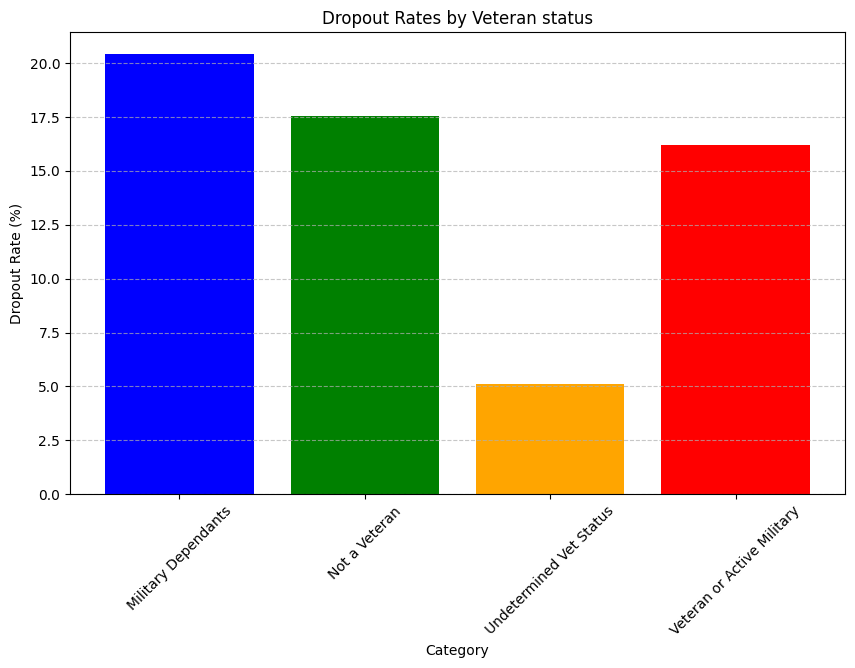

In [35]:
import matplotlib.pyplot as plt

# Data for the categories and dropout rates
categories = ["Military Dependants", "Not a Veteran", "Undetermined Vet Status", "Veteran or Active Military"]
dropout_rates = [20.409015, 17.547600, 5.128205, 16.221302]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, dropout_rates, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Category')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates by Veteran status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


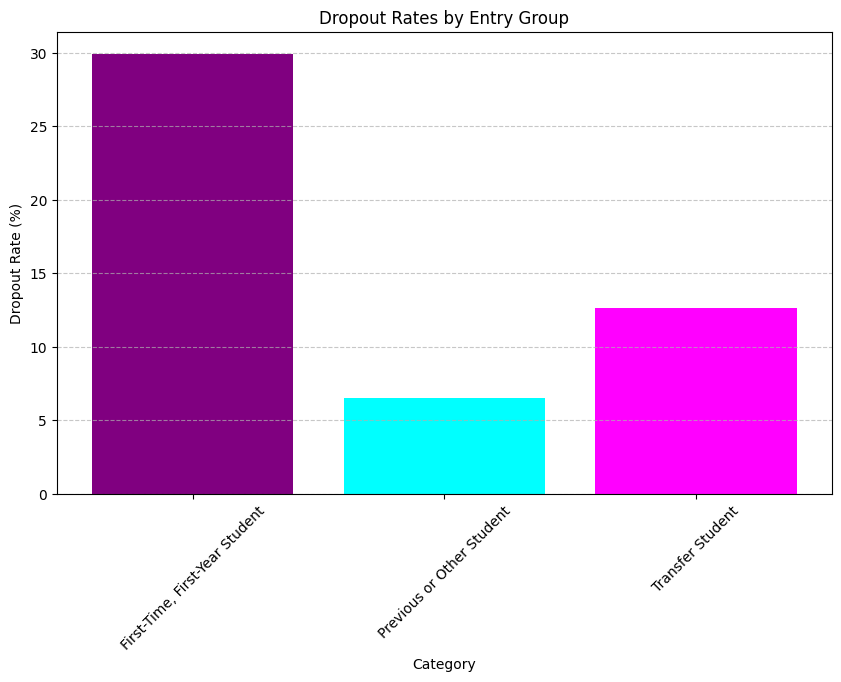

In [36]:
# Data for the new categories and dropout rates
new_categories = ["First-Time, First-Year Student", "Previous or Other Student", "Transfer Student"]
new_dropout_rates = [29.932945, 6.521739, 12.650550]

# Create a bar chart for the new categories
plt.figure(figsize=(10, 6))
plt.bar(new_categories, new_dropout_rates, color=['purple', 'cyan', 'magenta'])
plt.xlabel('Category')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates by Entry Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


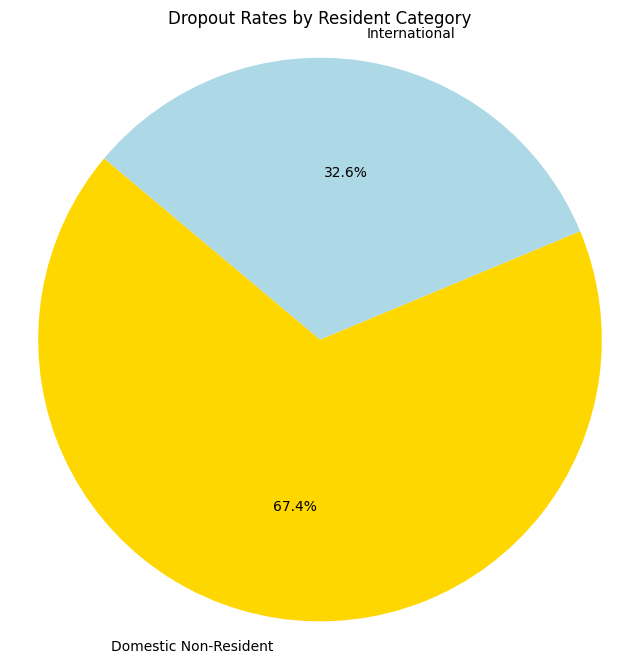

In [37]:
# Data for the resident categories and dropout rates
resident_categories = ["Domestic Non-Resident", "International"]
resident_dropout_rates = [19.502075, 9.435798]

# Create a pie chart for the resident categories
plt.figure(figsize=(8, 8))
plt.pie(resident_dropout_rates, labels=resident_categories, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue'])
plt.title('Dropout Rates by Resident Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


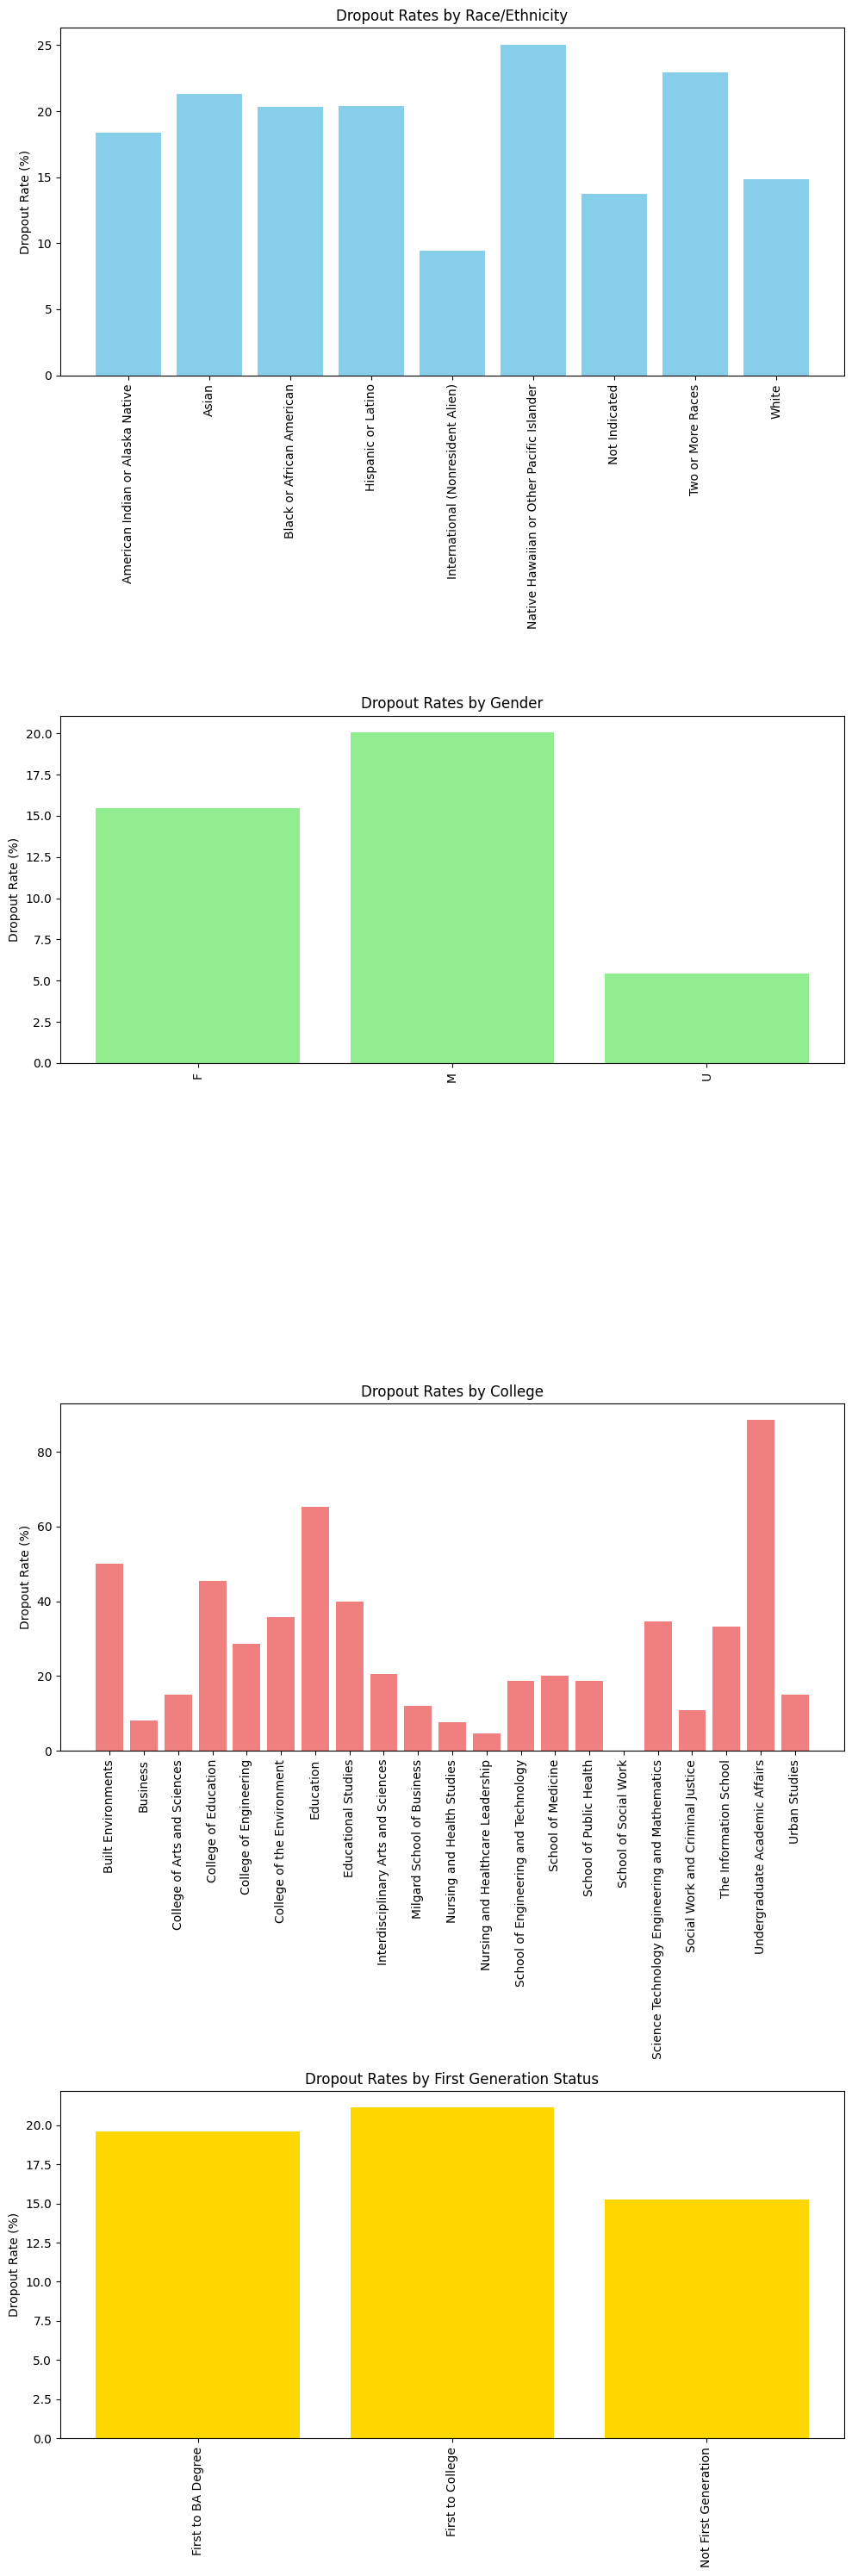

In [47]:
# Dropout percentage by 'EntryIPEDSRaceEthnicityCategory'
race_ethnicity_dropout_df = df.groupby('EntryIPEDSRaceEthnicityCategory').agg({'Dropout': 'mean'}).reset_index()
race_ethnicity_dropout_df['Dropout Rate (%)'] = race_ethnicity_dropout_df['Dropout'] * 100
race_ethnicity_dropout_df.drop('Dropout', axis=1, inplace=True)

# Dropout percentage by 'EntryGenderCode'
gender_dropout_df = df.groupby('EntryGenderCode').agg({'Dropout': 'mean'}).reset_index()
gender_dropout_df['Dropout Rate (%)'] = gender_dropout_df['Dropout'] * 100
gender_dropout_df.drop('Dropout', axis=1, inplace=True)

# Dropout percentage by 'entry_college'
college_dropout_df = df.groupby('FinCollegeReportingName').agg({'Dropout': 'mean'}).reset_index()
college_dropout_df['Dropout Rate (%)'] = college_dropout_df['Dropout'] * 100
college_dropout_df.drop('Dropout', axis=1, inplace=True)

# Dropout percentage by 'first_generation'
first_gen_dropout_df = df.groupby('first_generation').agg({'Dropout': 'mean'}).reset_index()
first_gen_dropout_df['Dropout Rate (%)'] = first_gen_dropout_df['Dropout'] * 100
first_gen_dropout_df.drop('Dropout', axis=1, inplace=True)

# Plotting the results again with the correct context for 'axs'
fig, axs = plt.subplots(4, 1, figsize=(10, 30))

# Race/Ethnicity Dropout Rates
axs[0].bar(race_ethnicity_dropout_df['EntryIPEDSRaceEthnicityCategory'], race_ethnicity_dropout_df['Dropout Rate (%)'], color='skyblue')
axs[0].set_title('Dropout Rates by Race/Ethnicity')
axs[0].set_ylabel('Dropout Rate (%)')
axs[0].tick_params(axis='x', rotation=90)

# Gender Dropout Rates
axs[1].bar(gender_dropout_df['EntryGenderCode'], gender_dropout_df['Dropout Rate (%)'], color='lightgreen')
axs[1].set_title('Dropout Rates by Gender')
axs[1].set_ylabel('Dropout Rate (%)')
axs[1].tick_params(axis='x', rotation=90)

# College Dropout Rates
axs[2].bar(college_dropout_df['FinCollegeReportingName'], college_dropout_df['Dropout Rate (%)'], color='lightcoral')
axs[2].set_title('Dropout Rates by College')
axs[2].set_ylabel('Dropout Rate (%)')
axs[2].tick_params(axis='x', rotation=90)

# First Generation Dropout Rates
axs[3].bar(first_gen_dropout_df['first_generation'], first_gen_dropout_df['Dropout Rate (%)'], color='gold')
axs[3].set_title('Dropout Rates by First Generation Status')
axs[3].set_ylabel('Dropout Rate (%)')
axs[3].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


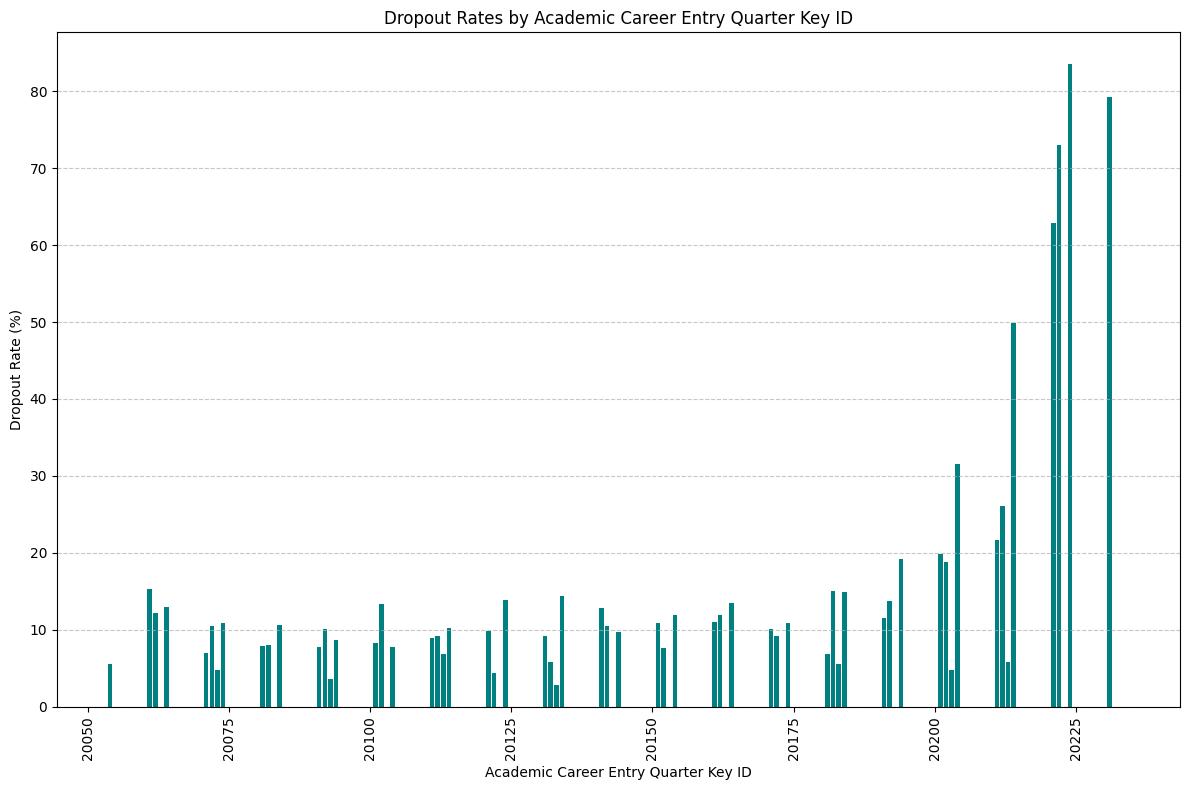

In [48]:
# Calculate dropout rates by 'AcademicCareerEntryQtrKeyId'
academic_career_entry_qtr_dropout_df = df.groupby('AcademicCareerEntryQtrKeyId').agg({'Dropout': 'mean'}).reset_index()
academic_career_entry_qtr_dropout_df['Dropout Rate (%)'] = academic_career_entry_qtr_dropout_df['Dropout'] * 100
academic_career_entry_qtr_dropout_df.drop('Dropout', axis=1, inplace=True)

# Plotting the dropout rates by 'AcademicCareerEntryQtrKeyId'
plt.figure(figsize=(12, 8))
plt.bar(academic_career_entry_qtr_dropout_df['AcademicCareerEntryQtrKeyId'], academic_career_entry_qtr_dropout_df['Dropout Rate (%)'], color='teal')
plt.xlabel('Academic Career Entry Quarter Key ID')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates by Academic Career Entry Quarter Key ID')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [51]:
# Create a table for dropout rates by 'AcademicCareerEntryQtrKeyId'
academic_career_entry_qtr_dropout_df.sort_values(by='Dropout Rate (%)', ascending=False, inplace=True)
academic_career_entry_qtr_dropout_df.reset_index(drop=True, inplace=True)

# Display the table
academic_career_entry_qtr_dropout_df


,AcademicCareerEntryQtrKeyId,Dropout Rate (%)
0,20224,83.466454
1,20231,79.227053
2,20222,73.000000
3,20221,62.895928
4,20214,49.821556
...,...,...
68,20173,0.000000
69,20063,0.000000
70,20232,0.000000
71,20233,0.000000


In [50]:
# Identify the academic year quarter with the highest dropout rate
max_dropout_row = academic_career_entry_qtr_dropout_df.loc[academic_career_entry_qtr_dropout_df['Dropout Rate (%)'].idxmax()]

max_dropout_row


academic_career_20224 = df[df['AcademicCareerEntryQtrKeyId'] == 20224]

# Group by the 'Dropout' column and count the number of students in each group
dropout_counts_20224 = academic_career_20224.groupby('Dropout').size().reset_index(name='Student Count')

dropout_counts_20224


,Dropout,Student Count
0,0,414
1,1,2090


from matplotlib import pyplot as plt
dropout_counts_20224['Dropout'].plot(kind='hist', bins=20, title='Dropout')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dropout_counts_20224['Student Count'].plot(kind='hist', bins=20, title='Student Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dropout_counts_20224.plot(kind='scatter', x='Dropout', y='Student Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Dropout']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Dropout'}, axis=1)
              .sort_values('Dropout', ascending=True))
  xs = counted['Dropout']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dropout_counts_20224.sort_values('Dropout', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dropout')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Student Count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Student Count'}, axis=1)
              .sort_values('Student Count', ascending=True))
  xs = counted['Student Count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dropout_counts_20224.sort_values('Student Count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Student Count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
dropout_counts_20224['Dropout'].plot(kind='line', figsize=(8, 4), title='Dropout')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dropout_counts_20224['Student Count'].plot(kind='line', figsize=(8, 4), title='Student Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
# Perform text analytics on string columns
text_analytics_results = {}
string_columns = ('Entry_group','EntryResidentCategory', 'EntryIPEDSRaceEthnicityCategory', 'EntryGenderCode',
                  'first_generation','RetainedNoYesYearLater','RetainedNo2YearLater','entry_college',
                  'entry_major','second_year_college','second_year_major','major_abbr','FinCollegeReportingName',
                  'new_vet_desc')


for column in string_columns:
    value_counts = df[column].value_counts()
    text_analytics_results[column] = value_counts

# Convert the text analytics results into a DataFrame for easy export to Power BI
text_analytics_df = pd.DataFrame.from_dict(text_analytics_results, orient='index').transpose()

text_analytics_df


,Entry_group,EntryResidentCategory,EntryIPEDSRaceEthnicityCategory,EntryGenderCode,first_generation,RetainedNoYesYearLater,RetainedNo2YearLater,entry_college,second_year_college,FinCollegeReportingName,entry_major,second_year_major,major_abbr,new_vet_desc
Transfer Student,45832.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"First-Time, First-Year Student",18194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previous or Other Student,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resident,NaN,60134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International,NaN,2056.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B PHYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
Not a Veteran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53466.0
Veteran or Active Military,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5314.0
Military Dependants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4792.0


In [16]:
# Adjust the list of text columns based on available columns
text_columns = ['Entry_group', 'EntryResidentCategory', 'EntryIPEDSRaceEthnicityCategory',
                'EntryGenderCode', 'first_generation', 'entry_college', 'entry_major',
                'second_year_college', 'second_year_major', 'major_abbr',
                'FinCollegeReportingName', 'new_vet_desc']

# Combine the selected text columns into a single text column
df['combined'] = df[text_columns].astype(str).agg(' '.join, axis=1)

# # Preprocess the text data if necessary (e.g., lowercasing, removing punctuation)
df['combined_text'] = df['combined'].str.lower()

df['combined_text']
df.head()

,SDBSrcSystemKey,AcademicCareerEntryQtrKeyId,transfer_student,Entry_group,EntryResidentCategory,PELL_Eligible_at_Entry,EntryIPEDSRaceEthnicityCategory,EntryGenderCode,EntryFullTimeStudentFlag,first_generation,...,last_mm_class,major_abbr,major_pathway,FinCollegeReportingName,new_vet_desc,CensusDayCumGPA,Age,Dropout,combined,combined_text
0,1099262,20081,1,Transfer Student,Resident,1,Black or African American,F,0,Not First Generation,...,3,TIAS,0.0,Interdisciplinary Arts and Sciences,Not a Veteran,3.18,40,0,Transfer Student Resident Black or African Ame...,transfer student resident black or african ame...
1,1099263,20144,1,Transfer Student,Resident,1,White,M,0,First to BA Degree,...,4,TCES,0.0,School of Engineering and Technology,Not a Veteran,3.47,34,0,Transfer Student Resident White M First to BA ...,transfer student resident white m first to ba ...
2,1099264,20074,1,Transfer Student,Resident,1,Asian,F,1,First to College,...,4,T ACCT,0.0,Milgard School of Business,Not a Veteran,3.33,60,0,Transfer Student Resident Asian F First to Col...,transfer student resident asian f first to col...
3,1099266,20084,1,Transfer Student,Resident,0,White,F,1,Not First Generation,...,4,TAMC,0.0,Interdisciplinary Arts and Sciences,Not a Veteran,3.33,39,0,Transfer Student Resident White F Not First Ge...,transfer student resident white f not first ge...
4,1099273,20074,1,Transfer Student,Resident,1,Black or African American,M,0,First to BA Degree,...,4,TGS,0.0,Interdisciplinary Arts and Sciences,Not a Veteran,3.13,62,0,Transfer Student Resident Black or African Ame...,transfer student resident black or african ame...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the combined text data to get TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

# Print the shape of the TF-IDF matrix
print(tfidf_matrix.shape)


(64118, 269)
